# Read Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load your dataset
data = pd.read_csv('covid_factTable.csv')

In [4]:
data.head(10)

,dateid,vacid,covidid,date,province,totalcases,recovery,death,partial,fully,booster,totalcases_change,recovery_change,death_change,partial_change,fully_change,booster_change
0,1,1,1,2021-01-02,BC,53162,42129,901,17510,0,0,0,0,0,0,0,0
1,1,2,2,2021-01-02,AB,104633,84827,1267,14244,0,0,0,0,0,0,0,0
2,1,3,3,2021-01-02,SK,15844,12975,158,3722,0,0,0,0,0,0,0,0
3,1,4,4,2021-01-02,MB,25026,19789,678,3540,2,0,0,0,0,0,0,0
4,1,5,5,2021-01-02,ON,193960,160526,4905,33191,0,0,0,0,0,0,0,0
5,1,6,6,2021-01-02,QC,204101,172047,7966,28691,1,0,0,0,0,0,0,0
6,1,7,7,2021-01-02,NL,390,372,4,1785,0,0,0,0,0,0,0,0
7,1,8,8,2021-01-02,NB,611,568,9,2905,0,0,0,0,0,0,0,0
8,1,9,9,2021-01-02,NS,1497,1399,65,2596,0,0,0,0,0,0,0,0
9,1,10,10,2021-01-02,PE,97,89,0,1932,0,0,0,0,0,0,0,0


In [5]:
summed_data = data.groupby("date").agg({
    'totalcases': 'sum',
    'recovery': 'sum',
    'death': 'sum',
    'partial': 'sum',
    'fully': 'sum',
    'booster': 'sum',
    'totalcases_change': 'sum',
    'recovery_change': 'sum',
    'death_change': 'sum',
    'partial_change': 'sum',
    'fully_change': 'sum',
    'booster_change': 'sum'
}).reset_index()

summed_data

,date,totalcases,recovery,death,partial,fully,booster,totalcases_change,recovery_change,death_change,partial_change,fully_change,booster_change
0,2021-01-02,599675,495066,15955,110118,3,0,0,0,0,0,0,0
1,2021-01-09,656408,552374,17020,300249,3941,0,56733,57308,1065,190131,3938,0
2,2021-01-16,704262,608068,18003,553819,20620,0,47854,55694,983,253570,16679,0
3,2021-01-23,741738,658971,19053,815195,54593,0,37476,50903,1050,261376,33973,0
4,2021-01-30,772321,700900,19909,968205,111205,0,30583,41929,856,153010,56612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2023-12-02,4844720,3954939,56724,101440992,31596053,19733320,11683,0,215,282948,706,7245
153,2023-12-09,4856586,3954939,56950,101693702,31594976,19738493,11866,0,226,252710,-1077,5173
154,2023-12-16,4868947,3954939,57132,101888153,31594521,19743667,12361,0,182,194451,-455,5174
155,2023-12-23,4880937,3954939,57311,102006204,31595524,19747995,11990,0,179,118051,1003,4328


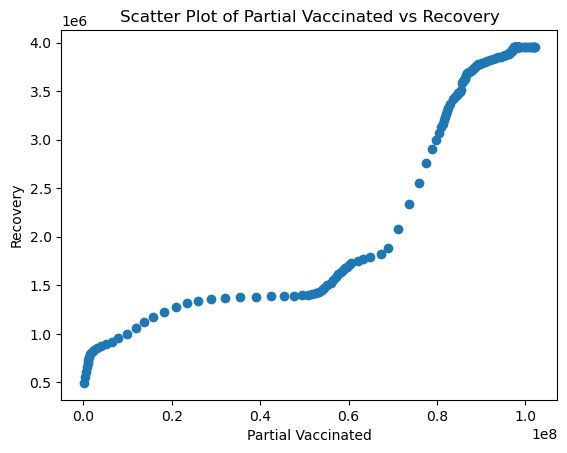

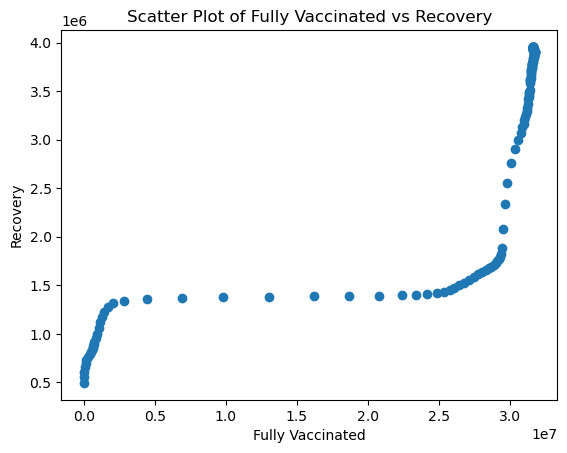

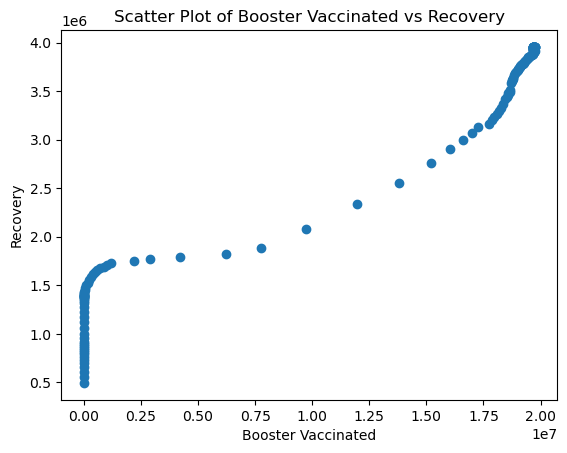

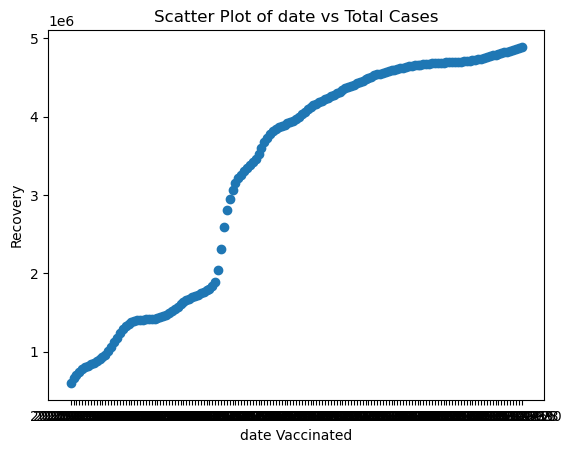

In [6]:
plt.scatter(summed_data['partial'] , summed_data['recovery'])
plt.xlabel('Partial Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of Partial Vaccinated vs Recovery')
plt.show()

plt.scatter(summed_data['fully'] , summed_data['recovery'])
plt.xlabel('Fully Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of Fully Vaccinated vs Recovery')
plt.show()

plt.scatter(summed_data['booster'] , summed_data['recovery'])
plt.xlabel('Booster Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of Booster Vaccinated vs Recovery')
plt.show()

plt.scatter(summed_data['date'] , summed_data['totalcases'])
plt.xlabel('date Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of date vs Total Cases')
plt.show()

# One-Class SVM Algorithm

We will discuss the outlier for vaccination status 

In [7]:
summed_data

,date,totalcases,recovery,death,partial,fully,booster,totalcases_change,recovery_change,death_change,partial_change,fully_change,booster_change
0,2021-01-02,599675,495066,15955,110118,3,0,0,0,0,0,0,0
1,2021-01-09,656408,552374,17020,300249,3941,0,56733,57308,1065,190131,3938,0
2,2021-01-16,704262,608068,18003,553819,20620,0,47854,55694,983,253570,16679,0
3,2021-01-23,741738,658971,19053,815195,54593,0,37476,50903,1050,261376,33973,0
4,2021-01-30,772321,700900,19909,968205,111205,0,30583,41929,856,153010,56612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2023-12-02,4844720,3954939,56724,101440992,31596053,19733320,11683,0,215,282948,706,7245
153,2023-12-09,4856586,3954939,56950,101693702,31594976,19738493,11866,0,226,252710,-1077,5173
154,2023-12-16,4868947,3954939,57132,101888153,31594521,19743667,12361,0,182,194451,-455,5174
155,2023-12-23,4880937,3954939,57311,102006204,31595524,19747995,11990,0,179,118051,1003,4328


In [11]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

x = summed_data[['partial','fully','booster']]
y = summed_data['totalcases']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3)

In [13]:
clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(Xtrain,Ytrain)
predictions = clf.predict(Xtest)

print("The number of outlier is "+str(len(predictions[predictions == -1])))

# Identify outlier indices
outliers_indices = predictions == -1

# Extract outlier data points
outlier_data = Xtest[outliers_indices]

outlier_data = outlier_data.sort_index()
# Print or further analyze the outlier data
print("Outlier Data:")
print(outlier_data)

The number of outlier is 48
Outlier Data:
       partial     fully   booster
0       110118         3         0
1       300249      3941         0
4       968205    111205         0
5      1081963    172339         0
10     2983627    611653        16
25    35394551   9768213      1069
28    45300763  18699268      3420
33    52563038  24851771     14789
41    57671217  27732389    376367
49    63224242  29219075   2879391
50    64937274  29305421   4188168
58    79783888  30579792  16603208
59    80399443  30760426  16982289
62    81657327  31020758  17862699
71    84782244  31346409  18589083
76    86029705  31431466  18767253
77    86212881  31444019  18794654
78    86310020  31452745  18812216
82    87589077  31494992  18970730
84    88086269  31514778  19023452
86    88638500  31536314  19078847
88    89093264  31557033  19154755
94    91944406  31624234  19358888
95    92620163  31637495  19396355
101   95588037  31706759  19623804
102   96064131  31722391  19667451
110   9712430

In [10]:
# import pandas as pd
# from sklearn.ensemble import IsolationForest

# # Load the dataset
# # summed_data = pd.read_csv('covid_FactTable.csv')

# # Select the relevant features for outlier detection
# features = ['totalcases', 'recovery', 'death', 'partial', 'fully', 'booster']
# X = summed_data[features]

# # Create an Isolation Forest object
# isolation_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, random_state=42)

# # Fit the Isolation Forest model
# isolation_forest.fit(X)

# # Get the anomaly scores for each data point
# anomaly_scores = isolation_forest.decision_function(X)

# # Identify outliers based on a threshold
# outlier_threshold = -0.01
# outliers = summed_data[anomaly_scores < outlier_threshold]

# # Print the outliers
# print("Identified Outliers:")
# print(outliers)